<a href="https://colab.research.google.com/github/Saliyan-moksh081/YULU-Business-case-study--Hypothesis-Testing/blob/master/YULU_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

Loading the data yulu dataset

In [ ]:
datadf = pd.read_csv('/content/yulu_Data.csv')
datadf.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


Exploring the data for null and outliers

In [ ]:
print(datadf.isna().sum())

datainfo = datadf.info()
print(datainfo)


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [ ]:
describe_data = datadf.describe()
print(describe_data)

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

Data analisys and visualization

1. Distribution of the total number of eletrical cycles rented

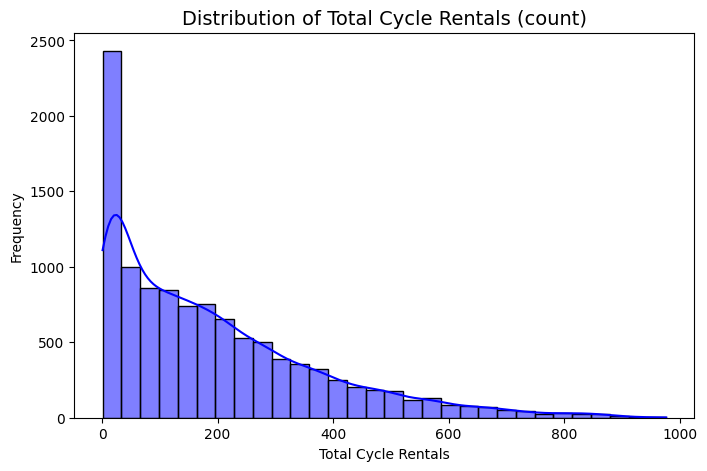

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(datadf['count'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Cycle Rentals (count)', fontsize=14)
plt.xlabel('Total Cycle Rentals')
plt.ylabel('Frequency')
plt.show()

We can see by the above histogram that the majority of the usage frequency lies to left side and the graph is right skewed

2.How does the demand for electric cyscles vary accross different seasons

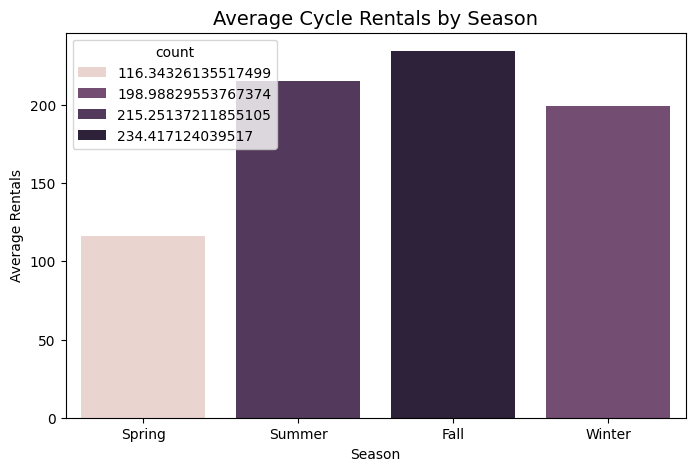

In [ ]:
season_demand = datadf.groupby('season')['count'].mean()


plt.figure(figsize=(8, 5))
sns.barplot(x=season_demand.index, y=season_demand.values, hue = season_demand)
plt.title('Average Cycle Rentals by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

By the above graph we can clearly see that the affect of season on the rentals of the yulu , and it seems tht fall and summer season has the highest rentals  and spring the lowest

3.Is there a difference in average rentals on working days versus holidays?



<ipython-input-10-59eae08a6a1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datadf, x='workingday', y='count', palette='Set2')


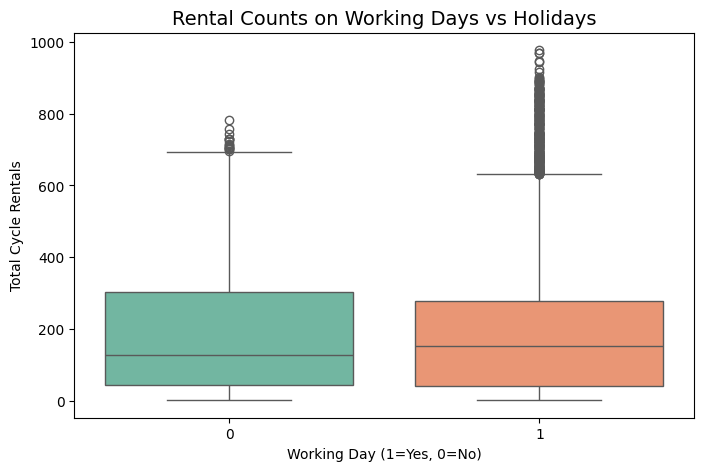

Average Rentals on Working Days:
 workingday
0    188.506621
1    193.011873
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datadf, x='workingday', y='count', palette='Set2')
plt.title('Rental Counts on Working Days vs Holidays', fontsize=14)
plt.xlabel('Working Day (1=Yes, 0=No)')
plt.ylabel('Total Cycle Rentals')
plt.show()

working_day_avg = datadf.groupby('workingday')['count'].mean()
print("Average Rentals on Working Days:\n", working_day_avg)

we can see that the average rentals on working days are more compared to holidays and we cab see by above graph that the number of outliers is more for working days

4.HYpothesis TEsting
2-Sample T-Test to Check if Working Day has an Effect on Cycle Rentals


Null Hypothesis (H₀): There is no difference in the average number of cycles rented on working days and non-working days


Alternative Hypothesis (H₁): There is a difference in the average number of cycles rented on working days and non-working days

In [ ]:
from scipy.stats import ttest_ind

workingday_data = datadf[datadf['workingday'] == 1]['count']
non_workingday_data = datadf[datadf['workingday'] == 0]['count']

# Perform t-test
t_stat, p_value = ttest_ind(workingday_data, non_workingday_data)

print("2-Sample T-Test for Working Day Effect on Cycle Rentals")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Working day has a significant effect on cycle rentals.")
else:
    print("Fail to reject the null hypothesis: No significant effect of working day on cycle rentals.")


2-Sample T-Test for Working Day Effect on Cycle Rentals
T-Statistic: 1.21
P-Value: 0.2264
Fail to reject the null hypothesis: No significant effect of working day on cycle rentals.


5.ANOVA to Check if Rentals Differ Across Weather Conditions

Null Hypothesis (H₀): Average rentals are the same across different weather conditions

Alternative Hypothesis (H₁): At least one weather condition has a different average rental count.

In [ ]:
from scipy.stats import f_oneway

# Group data by weather
weather_groups = [datadf[datadf['weather'] == i]['count'] for i in datadf['weather'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*weather_groups)

print("ANOVA Test for Rentals Across Weather Conditions")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: Rentals differ significantly across weather conditions.")
else:
    print("Fail to reject the null hypothesis: Rentals do not differ significantly across weather conditions.")


ANOVA Test for Rentals Across Weather Conditions
F-Statistic: 65.53
P-Value: 0.0000
Reject the null hypothesis: Rentals differ significantly across weather conditions.


6.Z-Test to Check if Temperature is Related to the Number of Rentals

Null Hypothesis- Temperature is not related to the number of rentals.


Alternate Hypothesis  Temperature is related to the number of rentals.

In [ ]:
from statsmodels.stats.weightstats import ztest


# Split the data into two groups based on rental count (above and below median)
median_rentals = datadf['count'].median()

group_high_rentals = datadf[datadf['count'] > median_rentals]['temp']
group_low_rentals = datadf[datadf['count'] <= median_rentals]['temp']

# Perform Z-test
z_stat, p_value = ztest(group_high_rentals, group_low_rentals)

# Results
print("Z-Test to Check if Temperature is Related to Number of Rentals")
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Temperature is related to the number of rentals.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between temperature and rentals.")



Z-Test to Check if Temperature is Related to Number of Rentals
Z-Statistic: 44.04
P-Value: 0.0000
Reject the null hypothesis: Temperature is related to the number of rentals.


7.Correlation between numerical features and count

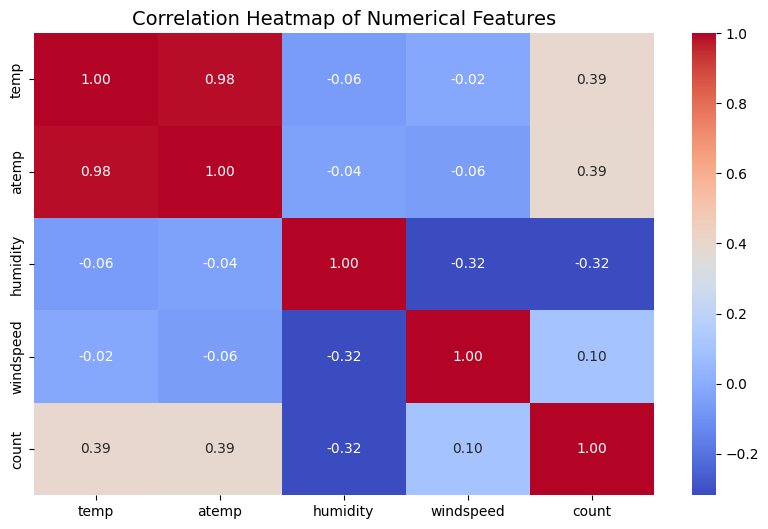

In [ ]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(10, 6))
sns.heatmap(datadf[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

8.Question 6: How does the number of casual and registered users vary across different seasons?

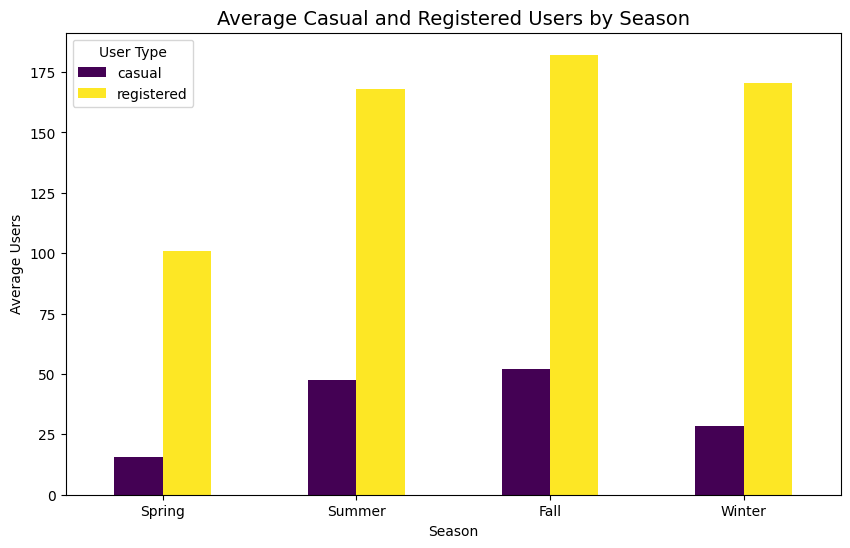

In [ ]:
season_users = datadf.groupby('season')[['casual', 'registered']].mean()

# Barplot for average casual and registered users by season
season_users.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Casual and Registered Users by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Average Users')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.legend(title='User Type')
plt.show()

We can see by the above bar chart that in all seasons the number of registered user is having more uasge compared to casual users

9.Relationship between weather conditions and humidity

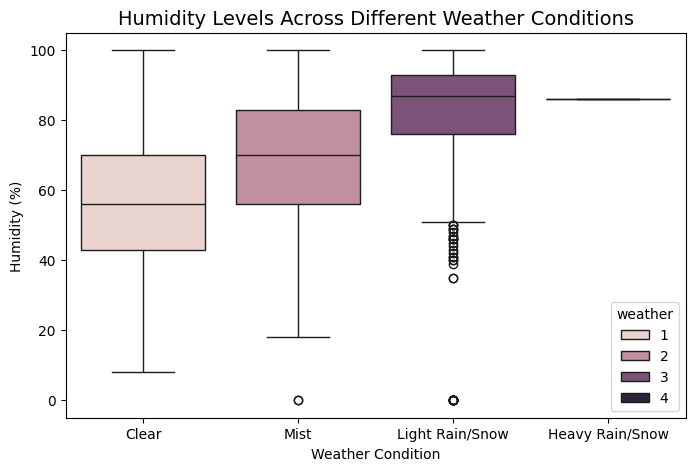

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datadf, x='weather', y='humidity', hue='weather')
plt.title('Humidity Levels Across Different Weather Conditions', fontsize=14)
plt.xlabel('Weather Condition')
plt.ylabel('Humidity (%)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

10.Does the number of cycles rented differ significantly between working and non-working days?

Null H0: there is no diffrence on rented cycles between working and non working days
alt Ha: there is a significance difference on rented cycles between working and non working days



In [ ]:
# 2-sample t-test for workingday effect
workingday_counts = datadf[datadf['workingday'] == 1]['count']
non_workingday_counts = datadf[datadf['workingday'] == 0]['count']
t_test_workingday, p_value = ttest_ind(workingday_counts, non_workingday_counts)

alpha = 0.05
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Working and non working days has a significant effect on cycle rentals.")
else:
    print("Fail to reject the null hypothesis: No significant effect of working day on cycle rentals.")




T-Statistic: 1.21
P-Value: 0.2264
Fail to reject the null hypothesis: No significant effect of working day on cycle rentals.


Recomendations
1. Yulu must focus on more on the registered user by giving some offers and discounts in ride fair so that they can increase the revenue
2. Yulu can keep more number of cycles in the season of fall and summer as more number of people are using in these seasons